In [121]:
#importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

#Loading the raw dataset into python enviroment
Telco_Customer_df = pd.read_csv("C:/Users/user/Documents/Data Analysis Course/Data Analysis Boot Camp/WA_Fn_UseC_Telco_Customer_Churn.csv")

#print the csv file
print(Telco_Customer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [123]:
#check for missing values in the data set
missing_values_count = Telco_Customer_df.isna().sum()

#Display columns with missing values
print(missing_values_count)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [125]:
import pandas as pd

# Replace empty strings with NaN in 'TotalCharges' column
Telco_Customer_df['TotalCharges'] = pd.to_numeric(Telco_Customer_df['TotalCharges'], errors='coerce')

# Remove rows with NaN values in 'TotalCharges' column
Telco_Customer_df.dropna(subset=['TotalCharges'], inplace=True)

In [131]:
#check for duplicates
Telco_Customer_df.duplicated(subset=None, keep='first')

#remove duplicate rows from the dataset
Telco_Customer_df.drop_duplicates(subset=None, keep='first', inplace=False)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


<Axes: >

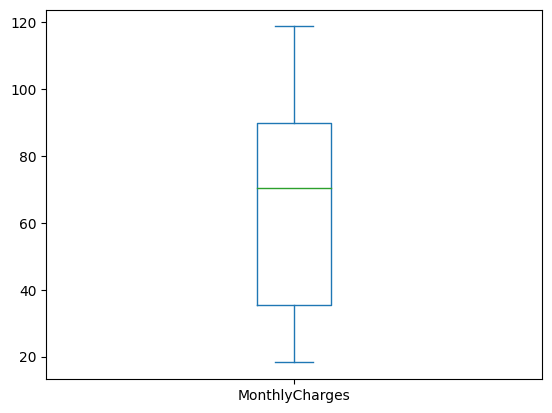

In [133]:

import pandas as pd
import numpy as np

# Calculate quartiles and IQR for MonthlyCharges
Q1_MonthlyCharges = Telco_Customer_df['MonthlyCharges'].quantile(0.25)
Q3_MonthlyCharges = Telco_Customer_df['MonthlyCharges'].quantile(0.75)
IQR_MonthlyCharges = Q3_MonthlyCharges - Q1_MonthlyCharges

# Calculate lower and upper bounds for MonthlyCharges
lower_bound = Q1_MonthlyCharges - 1.5 * IQR_MonthlyCharges
upper_bound = Q3_MonthlyCharges + 1.5 * IQR_MonthlyCharges

# Identify outliers in MonthlyCharges
outliers = Telco_Customer_df['MonthlyCharges'][Telco_Customer_df['MonthlyCharges'] < lower_bound] | Telco_Customer_df['MonthlyCharges'][Telco_Customer_df['MonthlyCharges'] > upper_bound]

#Visualize the outliers using a box plot
Telco_Customer_df['MonthlyCharges'].plot(kind='box')





<Axes: >

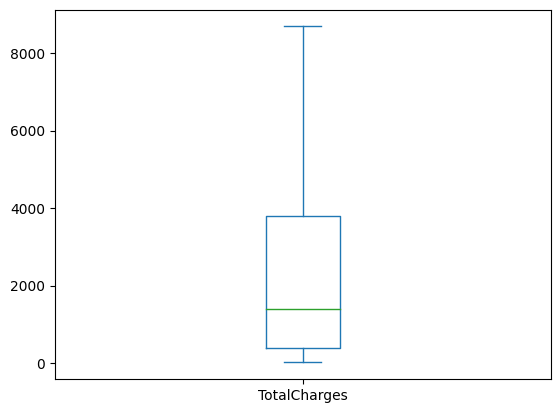

In [134]:
import pandas as pd
import numpy as np

# Calculate quartiles and IQR for TotalCharges
Q1_TotalCharges = Telco_Customer_df['TotalCharges'].quantile(0.25)
Q3_TotalCharges = Telco_Customer_df['TotalCharges'].quantile(0.75)
IQR_TotalCharges = Q3_TotalCharges - Q1_TotalCharges

# Calculate lower and upper bounds for TotalCharges
lower_bound = Q1_TotalCharges - 1.5 * IQR_TotalCharges
upper_bound = Q3_TotalCharges + 1.5 * IQR_TotalCharges

# Identify outliers in TotalCharges
outliers = Telco_Customer_df['TotalCharges'][Telco_Customer_df['TotalCharges'] < lower_bound] | Telco_Customer_df['TotalCharges'][Telco_Customer_df['TotalCharges'] > upper_bound]

#Visualize the outliers using a box plot
Telco_Customer_df['TotalCharges'].plot(kind='box')

In [135]:
# Specify the numeric columns for outlier removal
numeric_columns = ['MonthlyCharges', 'TotalCharges']

# function defined to remove outliers based on IQR
def remove_outliers_iqr(Telco_Customer_df, columns):
    for col in columns:
        Q1 = Telco_Customer_df[col].quantile(0.25)
        Q3 = Telco_Customer_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        Telco_Customer_df = Telco_Customer_df[(Telco_Customer_df[col] >= lower_bound) & (Telco_Customer_df[col] <= upper_bound)]
    return Telco_Customer_df

# Remove outliers from the MonthlyCharges and TotalCharges columns
Telco_Customer_df = remove_outliers_iqr(Telco_Customer_df, numeric_columns)

# Display the DataFrame without outliers
print(Telco_Customer_df)


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [136]:

# List of columns for mean imputation
columns_mean_imputation = ['MonthlyCharges', 'TotalCharges']

# Fill missing values with the mean of the specified columns
Telco_Customer_df[columns_mean_imputation] = Telco_Customer_df[columns_mean_imputation].fillna(Telco_Customer_df[columns_mean_imputation].mean())

# For 'TotalCharges' column
Telco_Customer_df['TotalCharges'].fillna(Telco_Customer_df['TotalCharges'].mean(), inplace=True)

#For 'MonthlyCharges' Column
Telco_Customer_df['MonthlyCharges'].fillna(Telco_Customer_df['MonthlyCharges'].mean(), inplace=True)

# Print the DataFrame
print(Telco_Customer_df)


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [137]:
# List of columns for Median imputation
columns_median_imputation = ['MonthlyCharges', 'TotalCharges']

# Fill missing values with the median of the specified columns
Telco_Customer_df[columns_median_imputation] = Telco_Customer_df[columns_median_imputation].fillna(Telco_Customer_df[columns_median_imputation].median())

# For 'TotalCharges' column
Telco_Customer_df['TotalCharges'].fillna(Telco_Customer_df['TotalCharges'].median(), inplace=True)

#For 'MonthlyCharges' Column
Telco_Customer_df['MonthlyCharges'].fillna(Telco_Customer_df['MonthlyCharges'].median(), inplace=True)

# Print the DataFrame
print(Telco_Customer_df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [106]:
#importing of pandas
import pandas as pd

# drop duplicates from all columns
Telco_Customer_df.drop_duplicates(inplace=True)

print(Telco_Customer_df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [138]:
# Remove all unnecessary columns 
Telco_Customer_df.drop(columns=["SeniorCitizen", "Partner", "Dependents", "StreamingTV", "StreamingMovies", "PaperlessBilling"], inplace=True)

# Print the DataFrame
print(Telco_Customer_df)

      customerID  gender  tenure PhoneService     MultipleLines  \
0     7590-VHVEG  Female       1           No  No phone service   
1     5575-GNVDE    Male      34          Yes                No   
2     3668-QPYBK    Male       2          Yes                No   
3     7795-CFOCW    Male      45           No  No phone service   
4     9237-HQITU  Female       2          Yes                No   
...          ...     ...     ...          ...               ...   
7038  6840-RESVB    Male      24          Yes               Yes   
7039  2234-XADUH  Female      72          Yes               Yes   
7040  4801-JZAZL  Female      11           No  No phone service   
7041  8361-LTMKD    Male       4          Yes               Yes   
7042  3186-AJIEK    Male      66          Yes                No   

     InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0                DSL             No          Yes               No          No   
1                DSL            Y

In [162]:
# importing pandas
import pandas as pd

# Use pandas' get_dummies function for one-hot encoding
encoded_data = pd.get_dummies(Telco_Customer_df, columns=['PhoneService', 'MultipleLines', 'OnlineSecurity', 'TechSupport','gender', 'Churn'])

# Print the encoded data
print(encoded_data.head())

   customerID  tenure InternetService OnlineBackup DeviceProtection  \
0  7590-VHVEG       1             DSL          Yes               No   
1  5575-GNVDE      34             DSL           No              Yes   
2  3668-QPYBK       2             DSL          Yes               No   
3  7795-CFOCW      45             DSL           No              Yes   
4  9237-HQITU       2     Fiber optic           No               No   

         Contract              PaymentMethod  MonthlyCharges  TotalCharges  \
0  Month-to-month           Electronic check           29.85         29.85   
1        One year               Mailed check           56.95       1889.50   
2  Month-to-month               Mailed check           53.85        108.15   
3        One year  Bank transfer (automatic)           42.30       1840.75   
4  Month-to-month           Electronic check           70.70        151.65   

   PhoneService_No  ...  OnlineSecurity_No  \
0             True  ...               True   
1           

In [143]:
# list of column names that represent numeric columns
numeric_cols = ['MonthlyCharges', 'TotalCharges', 'gender_Male', 'gender_Female', 'Churn_No', 'Churn_Yes', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_Yes']

# Import the StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the selected numeric columns
encoded_data[numeric_cols] = scaler.fit_transform(encoded_data[numeric_cols])

# Print the scaled DataFrame
print(encoded_data[numeric_cols])


      MonthlyCharges  TotalCharges  gender_Male  gender_Female  Churn_No  \
0          -1.161694     -0.994194    -1.009430       1.009430  0.601663   
1          -0.260878     -0.173740     0.990658      -0.990658  0.601663   
2          -0.363923     -0.959649     0.990658      -0.990658 -1.662059   
3          -0.747850     -0.195248     0.990658      -0.990658  0.601663   
4           0.196178     -0.940457    -1.009430       1.009430 -1.662059   
...              ...           ...          ...            ...       ...   
7038        0.664868     -0.129180     0.990658      -0.990658  0.601663   
7039        1.276493      2.241056    -1.009430       1.009430  0.601663   
7040       -1.170004     -0.854514    -1.009430       1.009430  0.601663   
7041        0.319168     -0.872095     0.990658      -0.990658 -1.662059   
7042        1.357932      2.012344     0.990658      -0.990658  0.601663   

      Churn_Yes  PhoneService_No  PhoneService_Yes  MultipleLines_No  \
0     -0.601663

In [144]:
# import pandas as pd
import pandas as pd

# Use the describe() method to summarize dataset
summary_stats = Telco_Customer_df.describe()

# Print the summary statistics
print(summary_stats)

            tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000


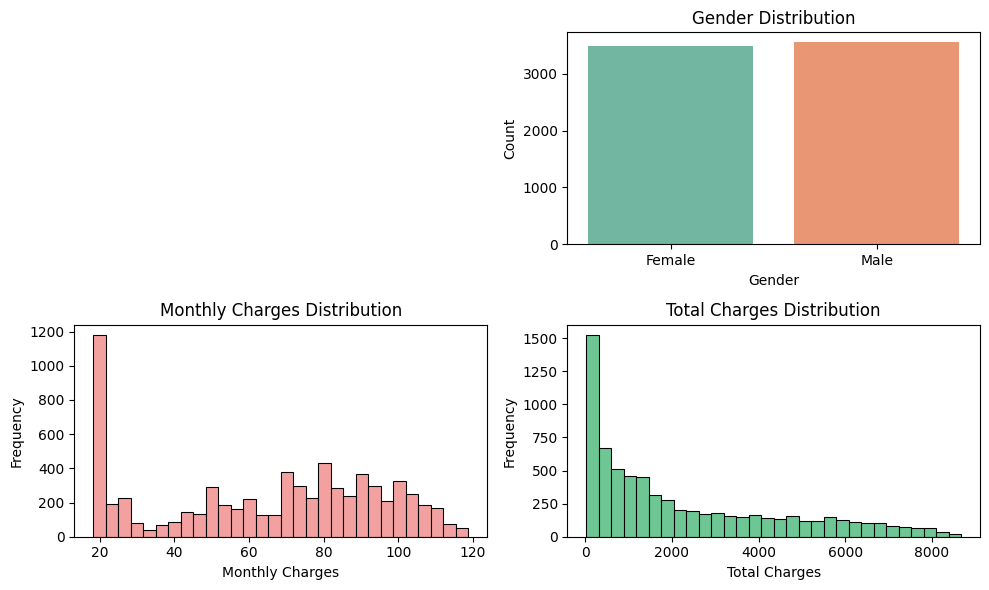

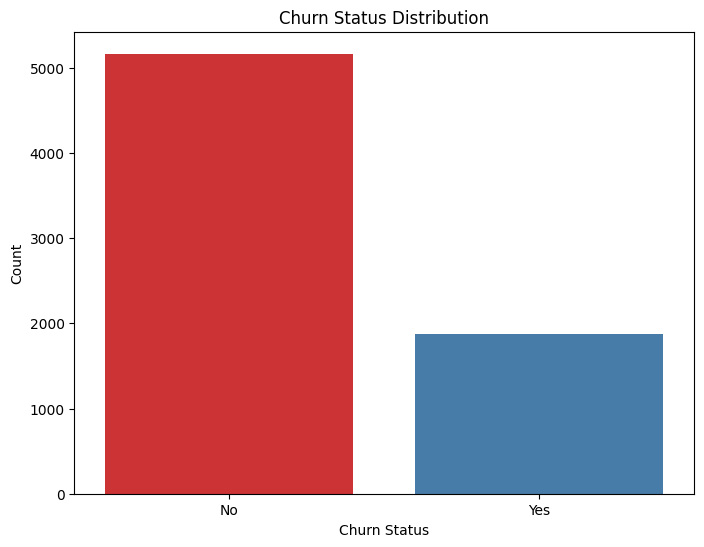

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the overall figure size
plt.figure(figsize=(10, 6))


# Subplot 1: Gender Distribution (Count Plot)
plt.subplot(2, 2, 2)
sns.countplot(data=Telco_Customer_df, x='gender', palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Subplot 2: Monthly Charges Distribution (Histogram)
plt.subplot(2, 2, 3)
sns.histplot(data=Telco_Customer_df, x='MonthlyCharges', bins=30, color='lightcoral')
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')

# Subplot 3: Total Charges Distribution (Histogram)
plt.subplot(2, 2, 4)
sns.histplot(data=Telco_Customer_df, x='TotalCharges', bins=30, color='mediumseagreen')
plt.title('Total Charges Distribution')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

# Churn Status Distribution (Count Plot)
plt.figure(figsize=(8, 6))
sns.countplot(data=Telco_Customer_df, x='Churn', palette='Set1')
plt.title('Churn Status Distribution')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.show()



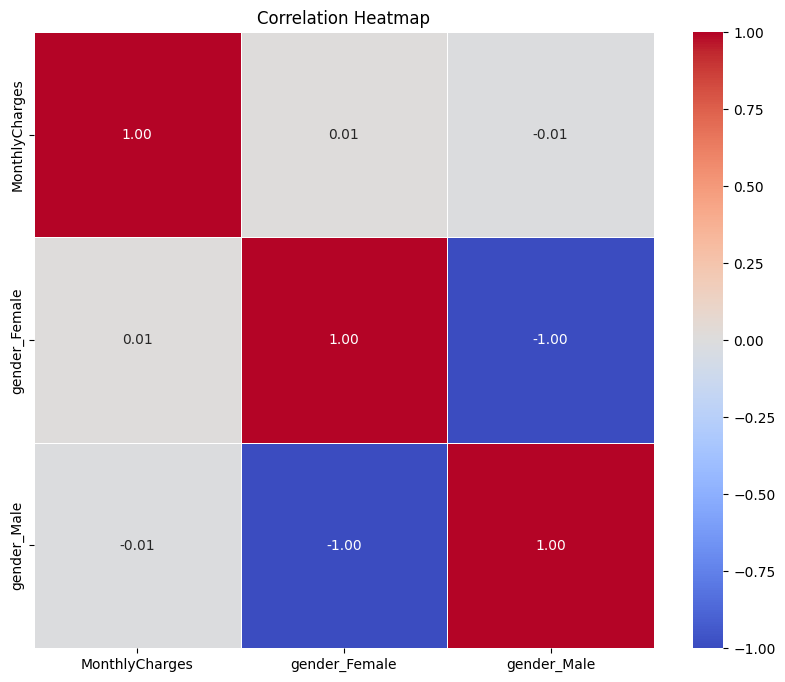

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selected columns for correlation 
correlation_df = encoded_data[['MonthlyCharges', 'gender_Female', 'gender_Male']]

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

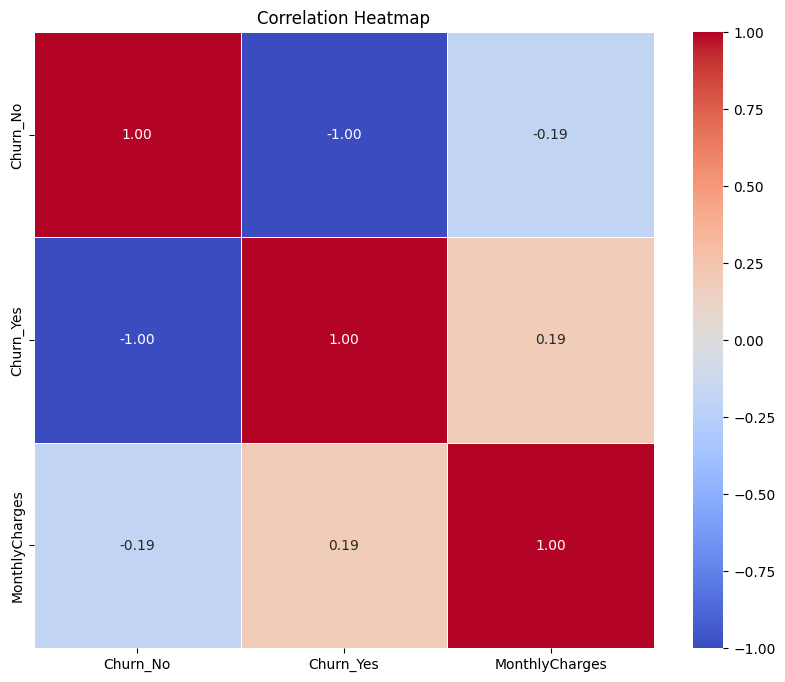

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selected columns for correlation 
correlation_df = encoded_data[['Churn_No', 'Churn_Yes', 'MonthlyCharges']]

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

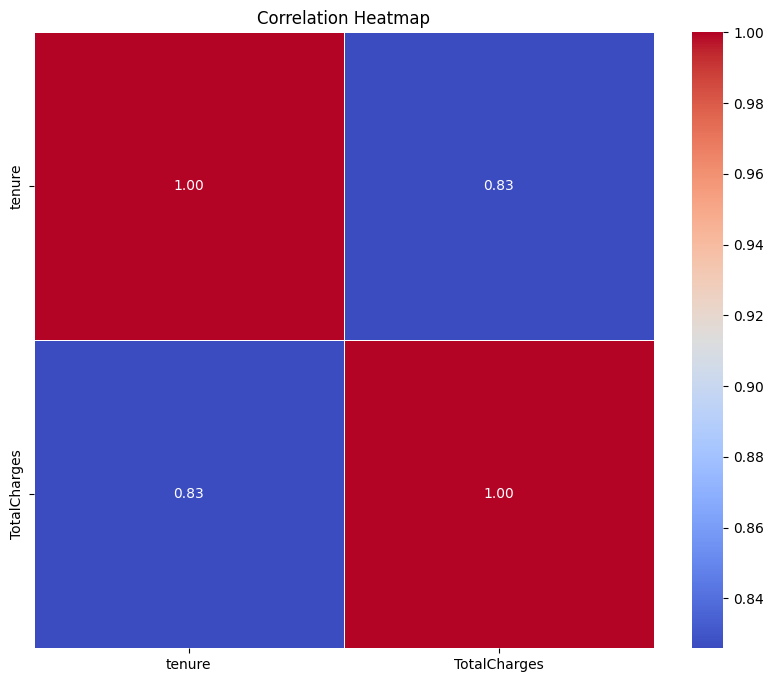

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selected columns for correlation 
correlation_df = encoded_data[['tenure', 'TotalCharges']]

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

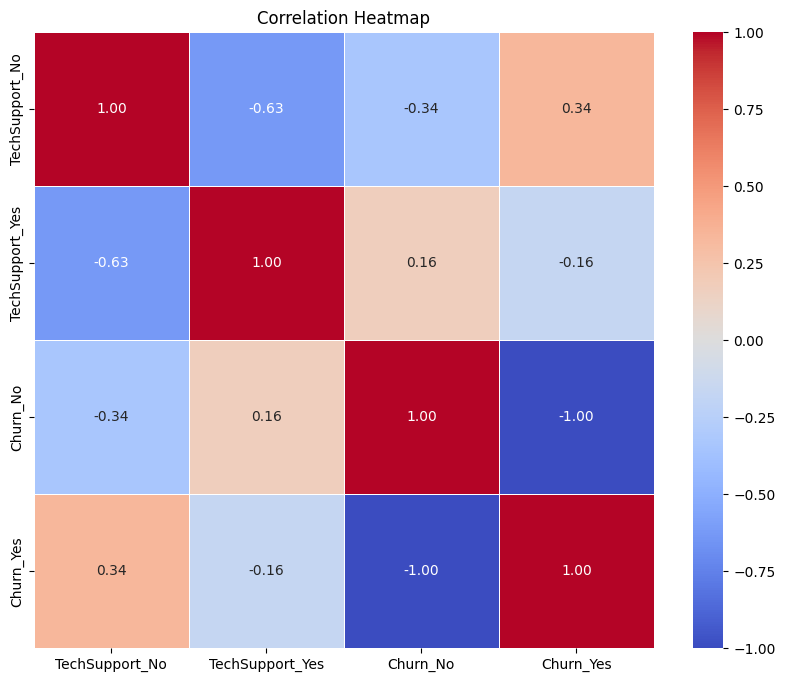

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selected columns for correlation 
correlation_df = encoded_data[['TechSupport_No', 'TechSupport_Yes', 'Churn_No', 'Churn_Yes']]

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [182]:
from scipy import stats

# compare the "TotalCharges" for churned and non-churned customers
churned = Telco_Customer_df[Telco_Customer_df['Churn'] == 'Yes']['TotalCharges']
not_churned = Telco_Customer_df[Telco_Customer_df['Churn'] == 'No']['TotalCharges']

# Perform an independent samples t-test
t_statistic, p_value = stats.ttest_ind(churned, not_churned, equal_var=False)

# Check the p-value to determine significance
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in TotalCharges between churned and non-churned customers.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in TotalCharges between churned and non-churned customers.")


Reject the null hypothesis: There is a significant difference in TotalCharges between churned and non-churned customers.


In [183]:
# Group by Contract and calculate summary statistics for numeric columns
contract_stats = Telco_Customer_df.groupby('Contract').agg({
    'MonthlyCharges': ['mean', 'median', 'std'],
    'TotalCharges': ['mean', 'median', 'std'],
})

# Rename the columns for clarity
contract_stats.columns = ['Avg Monthly Charges', 'Median Monthly Charges', 'Std Dev Monthly Charges',
                          'Avg Total Charges', 'Median Total Charges', 'Std Dev Total Charges']

# Display the summary statistics for each contract type
print(contract_stats)

                Avg Monthly Charges  Median Monthly Charges  \
Contract                                                      
Month-to-month            66.398490                   73.25   
One year                  65.079416                   68.75   
Two year                  60.872374                   64.45   

                Std Dev Monthly Charges  Avg Total Charges  \
Contract                                                     
Month-to-month                26.926599        1369.254581   
One year                      31.829391        3034.683084   
Two year                      34.712210        3728.933947   

                Median Total Charges  Std Dev Total Charges  
Contract                                                     
Month-to-month                679.55            1613.879008  
One year                     2657.55            2229.730075  
Two year                     3623.95            2571.252806  


In [184]:
# Group by PaymentMethod and calculate summary statistics for numeric columns
payment_stats = Telco_Customer_df.groupby('PaymentMethod').agg({
    'MonthlyCharges': ['mean', 'median', 'std'],
    'TotalCharges': ['mean', 'median', 'std'],
})

# Rename the columns for clarity
payment_stats.columns = ['Avg Monthly Charges', 'Median Monthly Charges', 'Std Dev Monthly Charges',
                         'Avg Total Charges', 'Median Total Charges', 'Std Dev Total Charges']

# Display the summary statistics for each payment method
print(payment_stats)


                           Avg Monthly Charges  Median Monthly Charges  \
PaymentMethod                                                            
Bank transfer (automatic)            67.205577                  73.250   
Credit card (automatic)              66.519264                  73.050   
Electronic check                     76.255814                  80.550   
Mailed check                         43.958354                  34.875   

                           Std Dev Monthly Charges  Avg Total Charges  \
PaymentMethod                                                           
Bank transfer (automatic)                30.572447        3079.299546   
Credit card (automatic)                  30.621316        3071.396022   
Electronic check                         24.053655        2090.868182   
Mailed check                             26.318624        1054.483915   

                           Median Total Charges  Std Dev Total Charges  
PaymentMethod                              

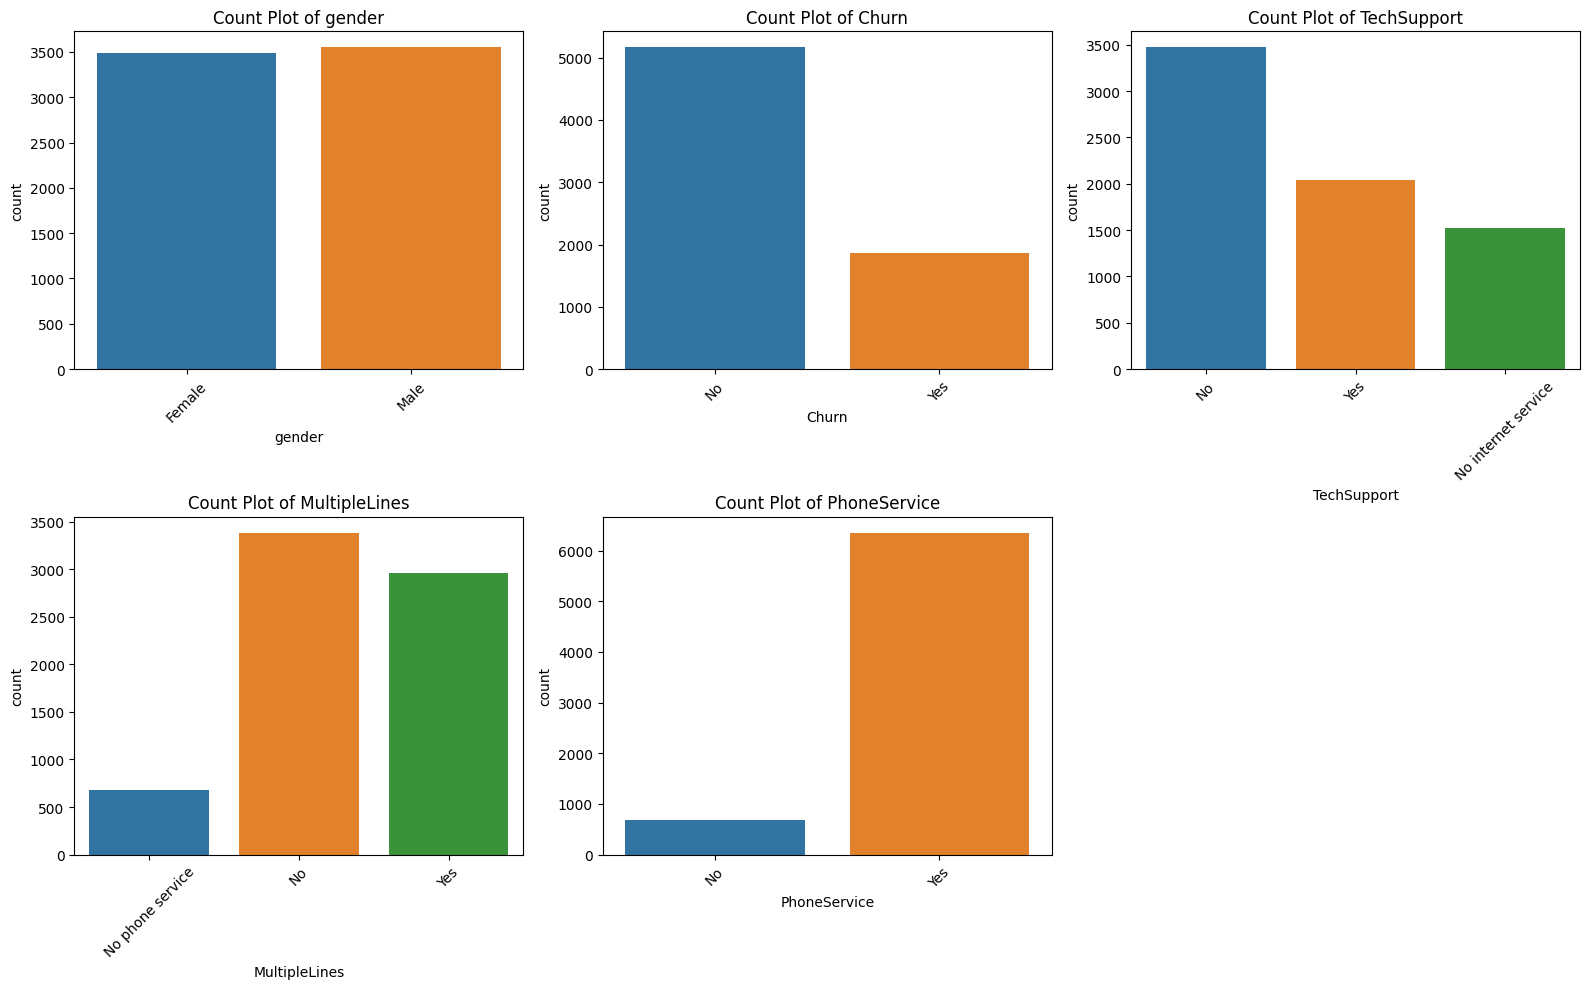

In [186]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for Categorical columns
categorical_cols = ['gender', 'Churn', 'TechSupport', 'MultipleLines', 'PhoneService']

# Creating bar plots for each categorical column
plt.figure(figsize=(16, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=Telco_Customer_df, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

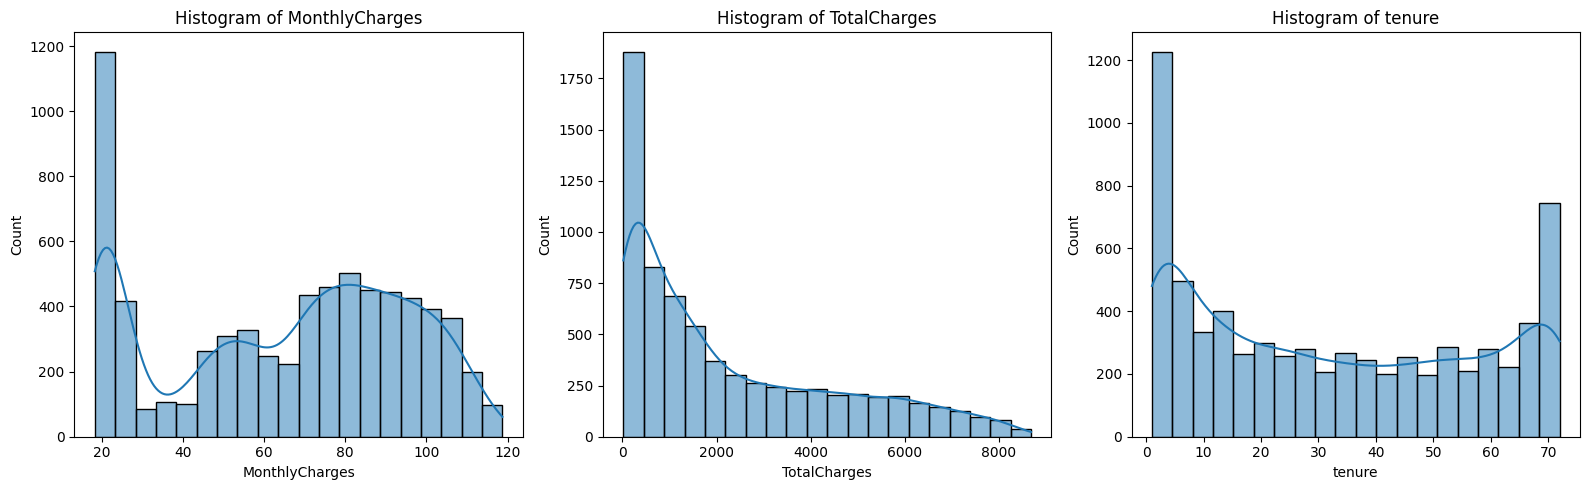

In [187]:
# Histogram for numeric columns
numeric_cols = ['MonthlyCharges', 'TotalCharges', 'tenure']

# Create subplots for each numeric column
plt.figure(figsize=(16, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=Telco_Customer_df, x=col, bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    
plt.tight_layout()
plt.show()


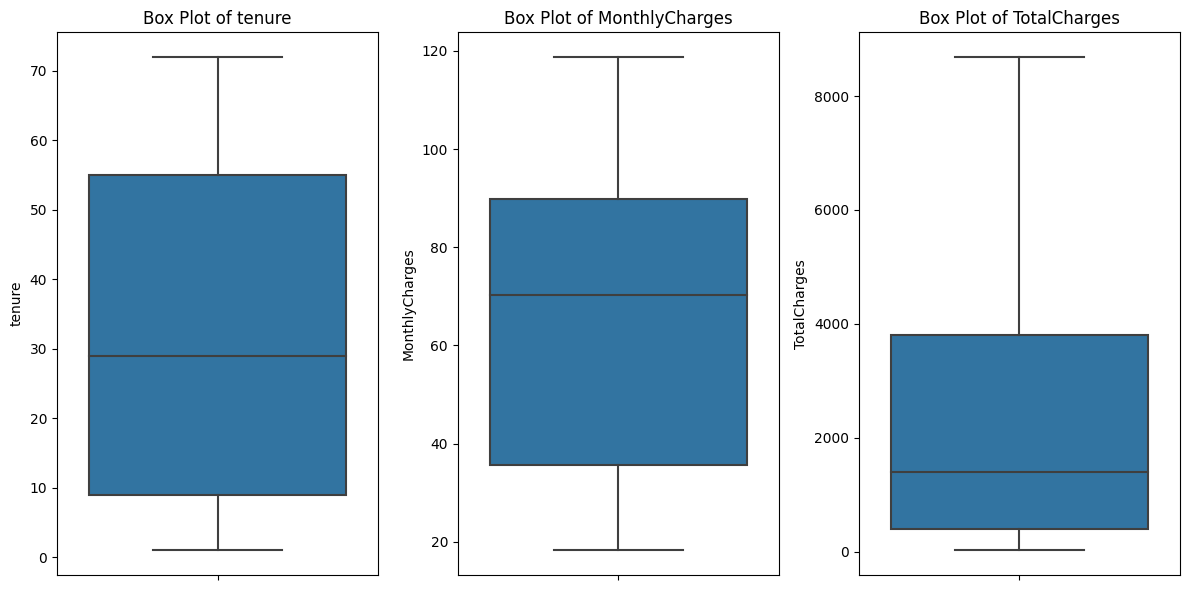

In [189]:
#import seaborn and matplotlib.pyplot 
import seaborn as sns
import matplotlib.pyplot as plt

# numeric columns from the DataFrame
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create box plot for each numeric column
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_cols), figsize=(12, 6))

# Create box plots for each numeric column
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=Telco_Customer_df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

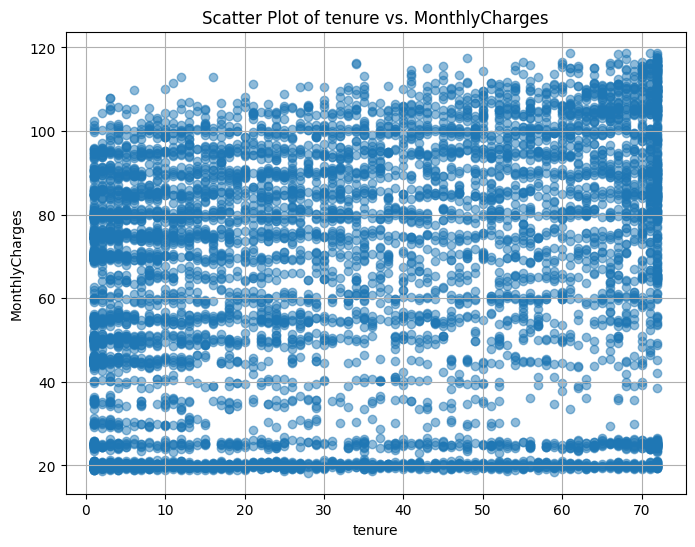

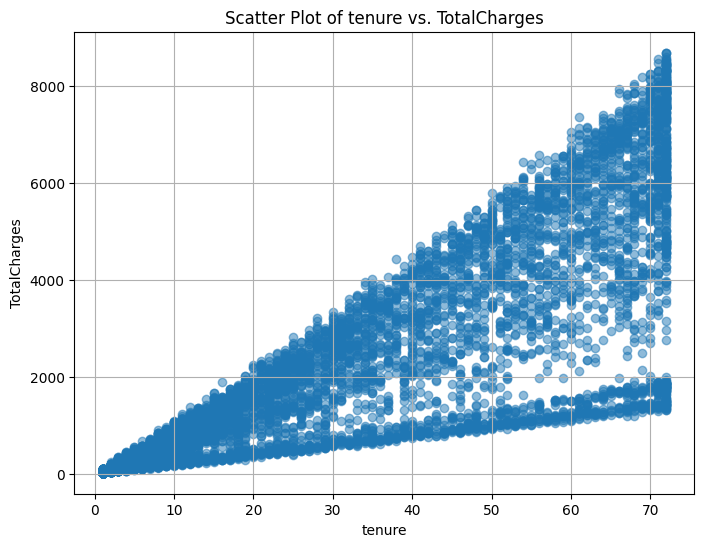

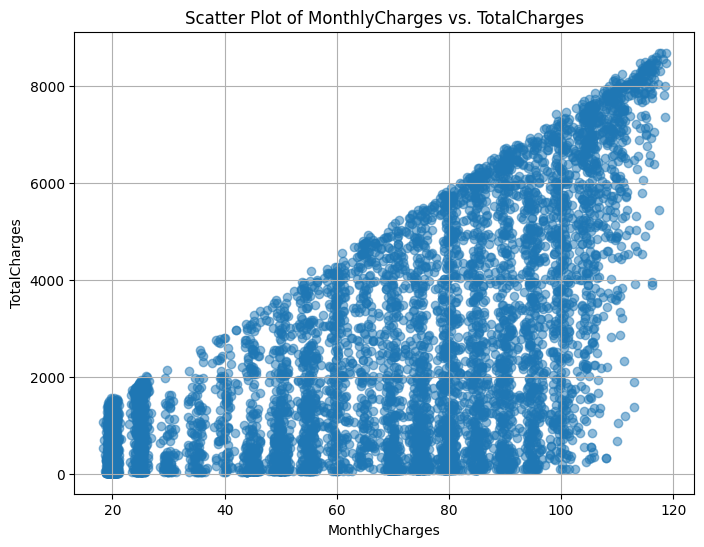

In [198]:

import matplotlib.pyplot as plt

# Select the numeric columns you want to explore
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create scatter plots for all combinations of numeric columns
for i in range(len(numeric_cols)):
    for j in range(i + 1, len(numeric_cols)):
        col_x = numeric_cols[i]
        col_y = numeric_cols[j]

        # Create a scatter plot
        plt.figure(figsize=(8, 6))
        plt.scatter(Telco_Customer_df[col_x], Telco_Customer_df[col_y], alpha=0.5)
        plt.title(f'Scatter Plot of {col_x} vs. {col_y}')
        plt.xlabel(col_x)
        plt.ylabel(col_y)
        plt.grid(True)
        plt.show()


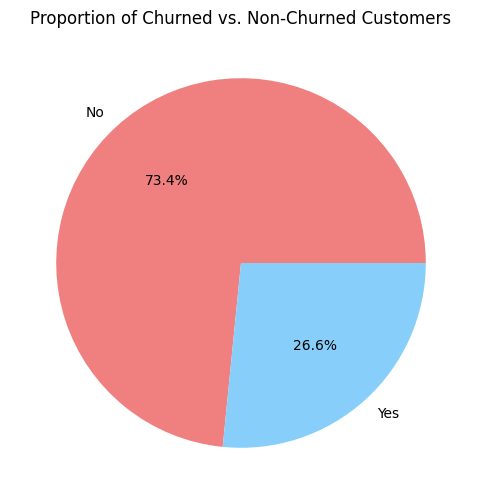

In [199]:
import matplotlib.pyplot as plt

# Assuming you have imported your DataFrame as telco_df

# Count the number of churned and non-churned customers
churn_counts = Telco_Customer_df['Churn'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Proportion of Churned vs. Non-Churned Customers')
plt.show()